# IMPORT

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# drop Row 
#df.drop(df.index[[1,3]])
df_age_negative = df[ df['output'] == 0 ]
df1 = df.drop(df_age_negative.index, axis=0) 

# EDA

In [4]:
df.shape

(303, 14)

## Checking Missing Data

<AxesSubplot:>

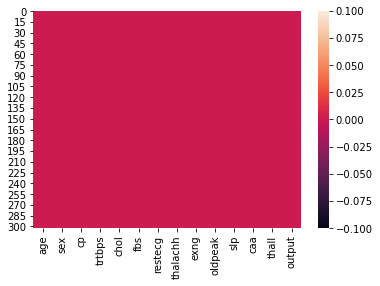

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No Missing Data

<AxesSubplot:xlabel='output', ylabel='count'>

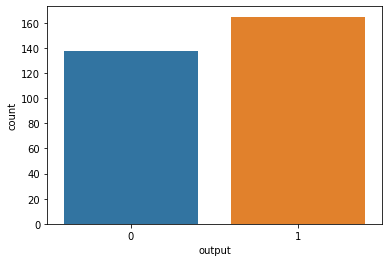

In [7]:
sns.countplot(data = df , x = 'output')

In [8]:
df['index'] = df.index.values

In [9]:
pd.pivot_table(df , values = 'index' , columns = 'output'   ,aggfunc='count')

output,0,1
index,138,165


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  index     303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [11]:
cat_features = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exng' , 'slp' , 'caa' , 'thall','output']

## Categorical Features Visualization

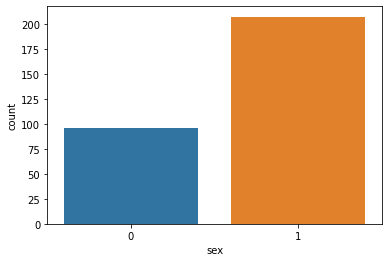

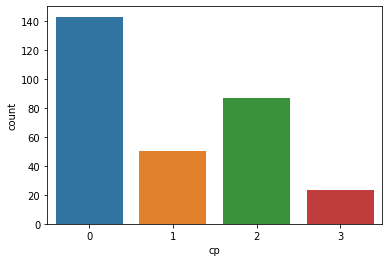

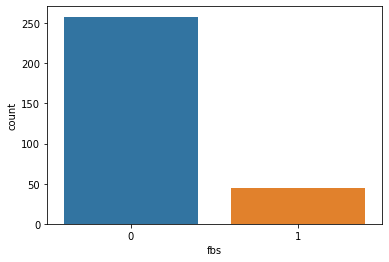

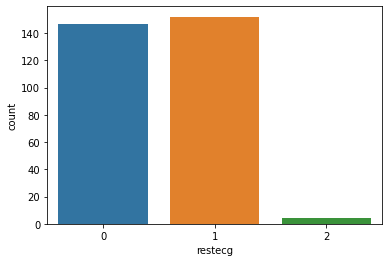

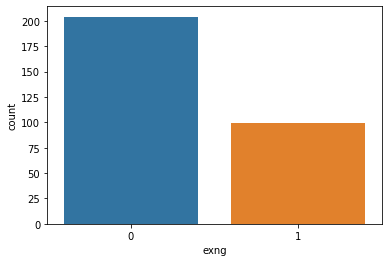

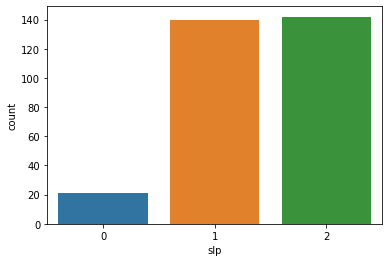

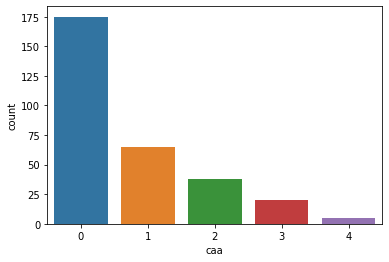

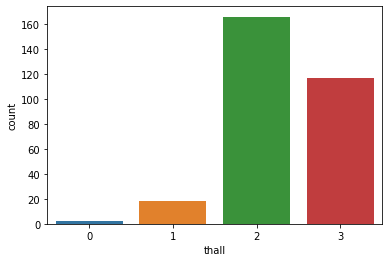

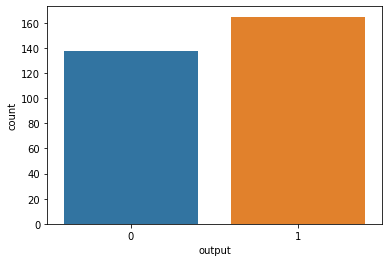

In [12]:
for i in cat_features:
    sns.countplot(data = df , x = i)
    plt.show()

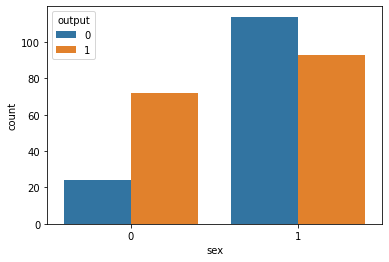

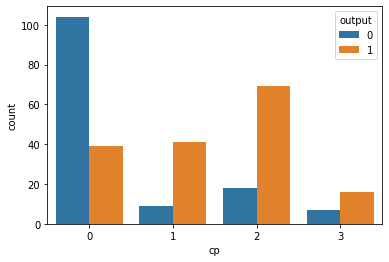

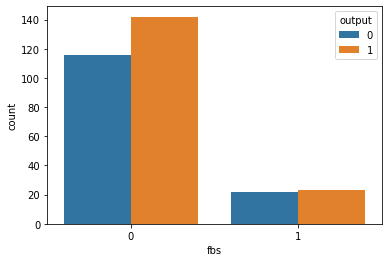

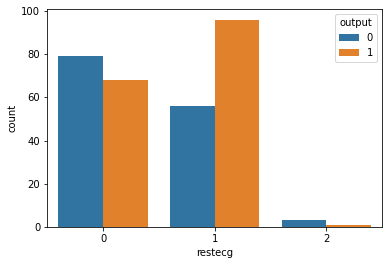

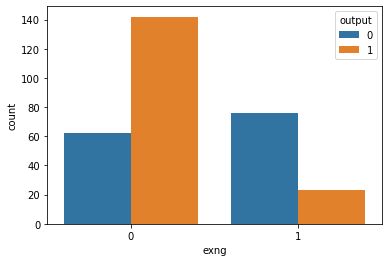

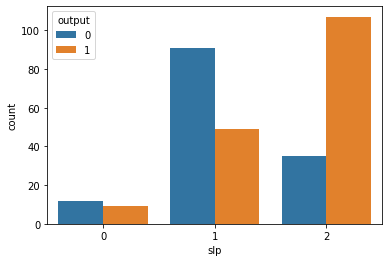

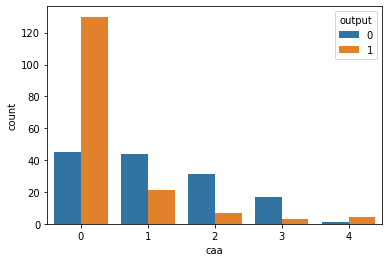

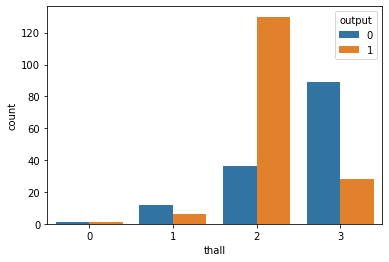

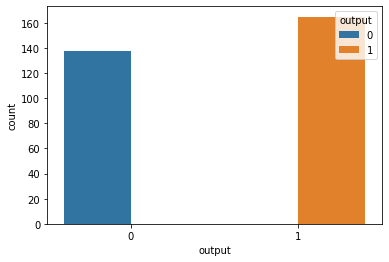

In [13]:
for i in cat_features:
    sns.countplot(data = df , x = i, hue='output')
    plt.show()

In [14]:
pd.crosstab(df["sex"],df["output"],margins=True)

output,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


## Numerical Features

In [15]:
num_features=[]
for i in df.columns:
    if i not in cat_features:
        num_features.append(i)


In [16]:
num_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'index']

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='age'>

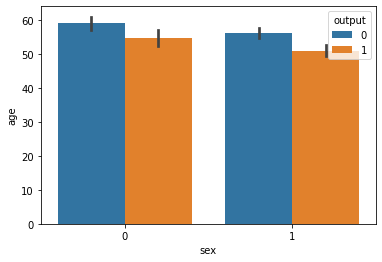

In [17]:
sns.barplot(df["sex"],df["age"],hue=df["output"])

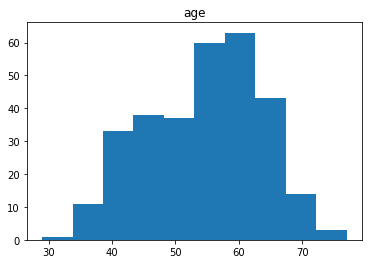

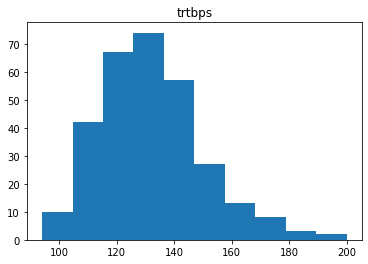

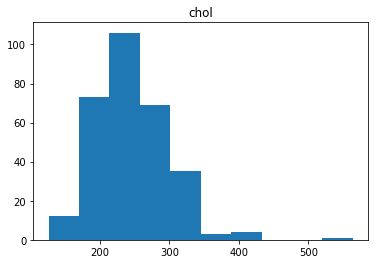

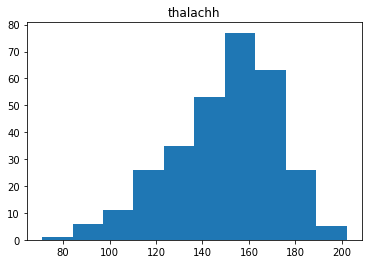

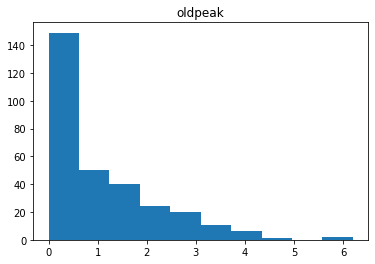

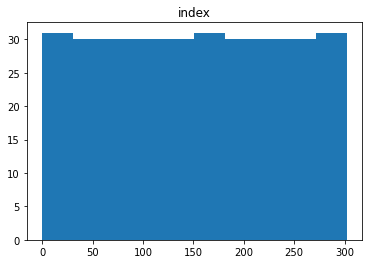

In [18]:
for i in num_features:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

# Correlation

In [19]:
cor=df.corr()
cor["output"].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
index      -0.862585
Name: output, dtype: float64

<AxesSubplot:>

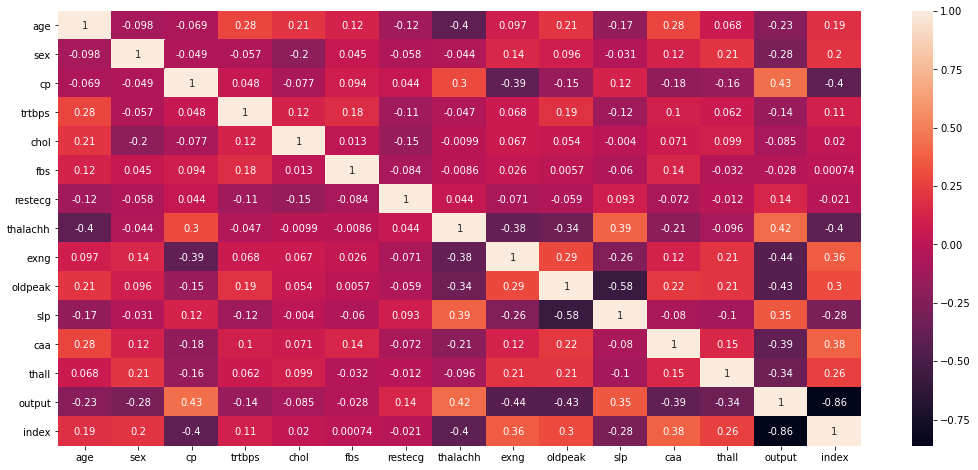

In [20]:
plt.figure(figsize = (18 , 8))
sns.heatmap(df.corr() , annot = True )

<AxesSubplot:>

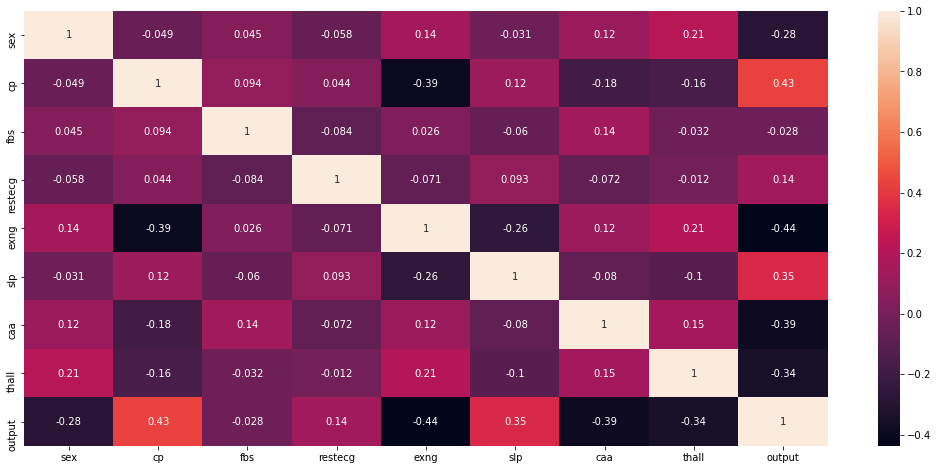

In [21]:
plt.figure(figsize = (18 , 8))
sns.heatmap(df[cat_features].corr() , annot = True )

<AxesSubplot:>

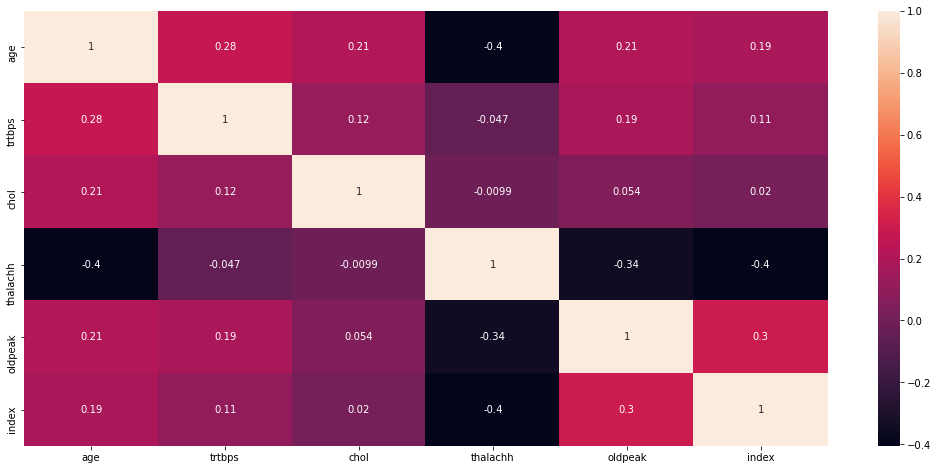

In [22]:
plt.figure(figsize = (18 , 8))
sns.heatmap(df[num_features].corr() , annot = True )

# More visualization 

<AxesSubplot:xlabel='sex', ylabel='count'>

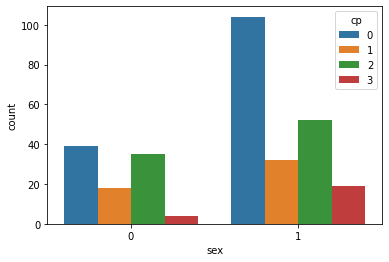

In [23]:
sns.countplot(data = df , x = 'sex', hue='cp')

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='age'>

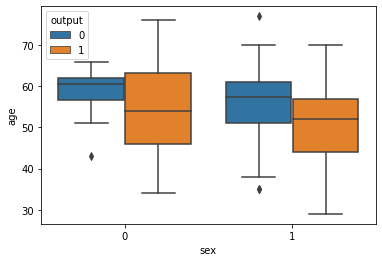

In [24]:
sns.boxplot(df["sex"],df["age"],hue=df["output"])

<b>Obervation:- <br></b>
    Most of the female between age 58 - 63 are less prone to heart attack. <br>
    Most of the female between age 45 - 65 are more prone to heart attack. <br>
    Most of the Male between age 60 - 52 are less prone to heart attack. <br>
    Most of the Male between age 55 - 45 are More prone to heart attack. <br>

<b>Conclusion:- <br></b>
    Irrespective of sex younger people are more prone to heart attack 

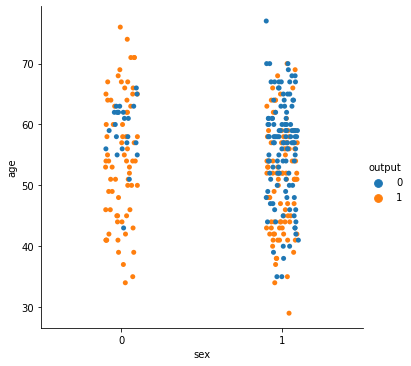

In [25]:
sns.catplot(x="sex", y="age", hue="output", data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

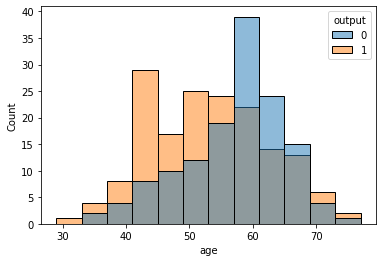

In [26]:
sns.histplot(data = df ,x =  'age' , hue = 'output' )

<AxesSubplot:xlabel='age', ylabel='Count'>

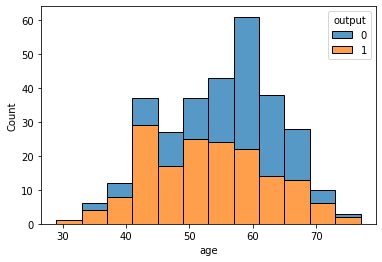

In [27]:
sns.histplot(data = df ,x =  'age' , hue = 'output', multiple="stack")

This is interesting to see that younger people have more chances of heart attack

<AxesSubplot:xlabel='chol', ylabel='Count'>

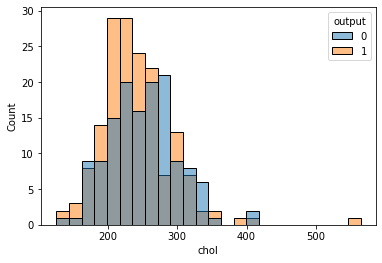

In [28]:
sns.histplot(data = df ,x =  'chol' , hue = 'output')

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

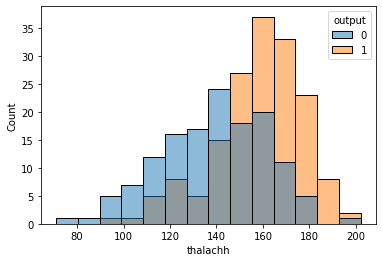

In [29]:
sns.histplot(data = df , x = 'thalachh' , hue = 'output')

People with more heart rate are prone to heart attack

# Splitting the data

In [30]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,index
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4


In [31]:
# we created an index for visualization now we are dropping it
df.drop(['index'],1,inplace=True)

In [32]:
y = df['output']
y = y.values
X = df.drop(['output'],1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


# Scaling

In [35]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Fitting the model on default parameters

In [36]:
from sklearn.pipeline import make_pipeline
models = [KNeighborsClassifier(),AdaBoostClassifier(),SVC(),LogisticRegression(),RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier()]
for i in models:
    pipe = make_pipeline(StandardScaler(),i)
    print(i," = ",np.mean(cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)))
    

KNeighborsClassifier()  =  0.8141156462585034
AdaBoostClassifier()  =  0.7604591836734694
SVC()  =  0.8183673469387754
LogisticRegression()  =  0.8180272108843537
RandomForestClassifier()  =  0.8181972789115646
GaussianNB()  =  0.789030612244898
DecisionTreeClassifier()  =  0.7522108843537415


# Hyperparameter tuning with pipeline

In [37]:
scores=[]
best_estimators = {}


model_params = {  
    
    
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,18,19,20],
            'kneighborsclassifier__algorithm' : ['auto','ball_tree'],
            'kneighborsclassifier__weights' : ['uniform','distance'],
            'kneighborsclassifier__leaf_size' : [27,28,29,30,31]
        }
    },
    
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__criterion': ['gini','entropy'],
            'decisiontreeclassifier__max_depth' : [None,1,2,6,5]
        }
    },
    
    
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'adaboostclassifier__n_estimators': [30,35,40,45,50,55],
            'adaboostclassifier__learning_rate' : [1,1.1,1.2,1.3,1.4,1.5],
            'adaboostclassifier__algorithm' : ['SAMME', 'SAMME.R']
        }
    },
    
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            
        }
    },
    
     'LOGISTIC_REGRESSION': {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__C': [1,2,3,4,5,6,7],
            'logisticregression__solver' : [ 'liblinear', 'lbfgs'],
            'logisticregression__multi_class' : ['auto', 'ovr' ]
        }
    },
    
        
    'SVM': {
        'model': SVC(),
        'params': {
             'svc__C': [1,2,3,5,6,7],
             'svc__kernel': ['rbf','linear'],
             'svc__gamma': ['auto', 'scale']
        }
    },
       
    'RANDOM_FOREST':{
        'model' : RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,2,3,4,5,10,15],
            'randomforestclassifier__criterion': ['entropy'],
            'randomforestclassifier__random_state' : [12,13],
            'randomforestclassifier__max_depth' : [5,6]

        }
    }
}

In [38]:
import time

pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 50))
for model_name, mp in model_params.items():
    
    pipe = make_pipeline(StandardScaler(),mp['model'])
    
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    start_time = time.time()
    
    clf.fit(X_train_scaled, y_train)
    
    

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': str(clf.best_params_)
    })
    best_estimators[model_name] = clf.best_estimator_
    print('{} minutes'.format((time.time() - start_time)/60))
    print('\n')


KNeighborsClassifier() {'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 18, 19, 20], 'kneighborsclassifier__algorithm': ['auto', 'ball_tree'], 'kneighborsclassifier__weights': ['uniform', 'distance'], 'kneighborsclassifier__leaf_size': [27, 28, 29, 30, 31]}
0.04000110626220703 minutes


DecisionTreeClassifier() {'decisiontreeclassifier__criterion': ['gini', 'entropy'], 'decisiontreeclassifier__max_depth': [None, 1, 2, 6, 5]}
0.001512622833251953 minutes


AdaBoostClassifier() {'adaboostclassifier__n_estimators': [30, 35, 40, 45, 50, 55], 'adaboostclassifier__learning_rate': [1, 1.1, 1.2, 1.3, 1.4, 1.5], 'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R']}
0.2821672558784485 minutes


GaussianNB() {}
0.0001828471819559733 minutes


LogisticRegression() {'logisticregression__C': [1, 2, 3, 4, 5, 6, 7], 'logisticregression__solver': ['liblinear', 'lbfgs'], 'logisticregression__multi_class': ['auto', 'ovr']}
0.006715087095896403 minutes


SVC() {'svc__C': [1, 2, 3, 5, 6, 7], 'svc_

In [39]:
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2 = df2.sort_values(by='best_score',ascending=False)
df2

,model,best_score,best_params
2,AdaBoostClassifier,0.834609,"{'adaboostclassifier__algorithm': 'SAMME', 'ad..."
0,KNeighborsClassifier,0.826616,"{'kneighborsclassifier__algorithm': 'auto', 'k..."
4,LOGISTIC_REGRESSION,0.822109,"{'logisticregression__C': 2, 'logisticregressi..."
5,SVM,0.818367,"{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kern..."
6,RANDOM_FOREST,0.818112,{'randomforestclassifier__criterion': 'entropy...
3,GaussianNB,0.789031,{}
1,DecisionTreeClassifier,0.772789,"{'decisiontreeclassifier__criterion': 'gini', ..."


# Fitting the model

In [40]:
ada = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 50)
ada.fit(X_train_scaled, y_train)
print("Train Accuracy = ",ada.score(X_train_scaled, y_train))
print("Test Accuracy = ",ada.score(X_test_scaled, y_test))

Train Accuracy =  0.8842975206611571
Test Accuracy =  0.819672131147541


AdaBoostClassifier is the Best among all

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = ada.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



array([[26,  3],
       [ 8, 24]], dtype=int64)

We can see that model is performing well and it is able to classify both the classes

# USING PIPE

In [42]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 50))
pipe.fit(X_train,y_train)
print("Train Accuracy = ",pipe.score(X_train,y_train))
print("Test Accuracy  = ",pipe.score(X_test,y_test))

y_pred = pipe.predict(X_test)
print(classification_report(y_test,y_pred))

Train Accuracy =  0.8842975206611571
Test Accuracy  =  0.819672131147541
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



# Trying PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(0.99)

In [44]:
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [45]:
ada = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, n_estimators = 50)
ada.fit(X_train_scaled_pca, y_train)
print(ada.score(X_train_scaled_pca, y_train))
print(ada.score(X_test_scaled_pca, y_test))

0.9173553719008265
0.8524590163934426


With PCA accuracy is increasing

# Pickle

In [46]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(pipe, pickle_out)
pickle_out.close()

In [47]:
pipe.predict([[57,1,0,150,276,0,0,112,1,0.6,1,1,1]])

array([0], dtype=int64)

In [48]:
#pip freeze >requirements.txt

Note: you may need to restart the kernel to use updated packages.
